<a href="https://colab.research.google.com/github/nicolasroques/Project-Neuchatel/blob/main/Project_Data_Science_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class.
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1542704

You have decided to form a startup called “LingoRank” with your University friend and become a millionaire. You have until the end the semester to create a proof of concept for your investors. Your startup will revolutionize the way people learn and get better at a foreign language.

### THE IDEA
You have noticed that to improve one’s skills in a new foreign language, it is important to read texts in that language. These texts have to be at the reader’s language level. However, it is difficult to find texts that are close to someone’s knowledge level (`A1 to C2`). You have decided to build a model for English speakers that predicts the difficulty of a French written text. This can be then used, e.g., in a recommendation system, to recommend texts, e.g, recent news articles that are appropriate for someone’s language level. If someone is at A1 French level, it is inappropriate to present a text at B2 level, as she won’t be able to understand it. Ideally, a text should have many known words and may have a few words that are unknown so that the person can improve.

### 🗄 DATA
You can find the training data and the unlabeled test data in the Data tab.

### 🚀 SUBMISSION
As you build your model and train it on the training data, you can generate predictions for the ( unlabelled ) test data. Make sure that your submission file has the same format as the `sample_submission.csv` file in the Data tab. Once you are sure about your model and satisfied with the prediction accuracy you got on your own test data, you can try to generate predictions for the actual test data and submit it to the competition.

As soon as you make a submission you can see the prediction accuracy and your ranking on the leaderboard. Note that you can only make 5 submissions per day. To know more about the competition rules, check out the rules tab.

### 🚚  DELIVERABLES

-    **Github**: A project GitHub page. There, report the following table *without doing any cleaning on the data*. Do hyper-parameter optimization to find the best solution. Your code should justify your results.

|  |  Logistic regression |  kNN | Decision Tree | Random Forests | Any other technique |
| --- | --- | --- | --- | --- |
|Precision |  | | | |
|  Recall |  | | | |
|  F1-score |  | | | |
|  Accuracy |  | | | | |  |  |



-    Which is the best model?
-    Show the confusion matrix.
-    Show examples of some erroneous predictions. Can you understand where the error is coming from?
-    Do some more analysis to better understand how your model behaves.
-    Have a position in the leaderboard of this competition

Then try to improve this solution and climb up the leaderboard ladder! Expected score results:

>0.46 -> Hm,….you could have tried harder…
>0.47 - 0.52 -> not bad, but you could have done better.
>0.56 - 0.57 -> You did your work
>0.7 -> You used text embeddings, very good
>0.78+ -> WOW!

- **User interface/application**: Think how to use the model in an application. Create a UI with streamlit. You are free to conceive and create whichever application you like with your text difficulty model.


-    **Video**: Create a YouTube video of your solution and embed it in your notebook. Imagine you are giving a presentation or a tutorial. The video should explain:
    -    The problem, your algorithm, how you determine the difficulty.
    -    An evaluation of your solution *accuracy, precision, recall, F1-score, etc*.
    -    A demo of your solution (the UI you implemented).

Upload the video on **Youtube** (set it as *unlisted* if you don't wish it to be publicly visible) and put the link to the video in the readme of the Github repository of your team.

### Tips:

Things you should considering trying are:
- data cleaning (maybe not so important in this dataset, but try!)
- data augmentation (sentence features, e.g., length, [cognates](https://www.fluentin3months.com/french-cognates/), POS, etc),
- use [text embeddings](https://huggingface.co/blog/getting-started-with-embeddings) (Bert, RoBerta, etc). That's your best bet for boosting prediction accuracy. First use a [static embeddings](https://www.kaggle.com/code/matleonard/word-vectors/notebook). Then you can use an embedding and post-train it ([transfer learning](https://spacy.io/usage/embeddings-transformers)) with our own data labels. This should give you (ideally!) the best results.

More ideas for those that wish to go the extra mile:
- Make an application that searches and ranks French YouTube videos using the captions.
- Create an interpretable model that highlights the difficulty of the words/phrases.

### 👩‍💻 LOGISTICS AND DEADLINE

First of all, create an account in kaggle (if you don't have one already). As you enter the competition page, under the Team tab you can merge your user account with your teammates in order to create a *team*. For selecting your team name, please follow the following guideline:

-    For students, participating from UNIL use: `UNIL_<your team name>`. For students from EPFL use: `EPFL_<your team name>`.

Your team name will be shown on the leaderboard and you can compare your score with other teams as you submit your solution. Make sure to mention your team name in your notebook.

###📱 CONTACT
-    Stergios
-    Ludovic

## Some further details for points 3 and 4 above.

### 3. Read data into your notebook with the Kaggle API (optional but useful).

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [171]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [172]:
# install Kaggle
! pip install kaggle

Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file, which you save on your Google Drive directy in my drive.

In [173]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [174]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json


### if the next step fails, please refer to the documentation [available here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

In [175]:
# download the dataset from the competition page
! kaggle competitions download -c detecting-french-texts-difficulty-level-2023
from zipfile import ZipFile
with ZipFile('detecting-french-texts-difficulty-level-2023.zip','r') as zip:
  zip.extractall(path="")

detecting-french-texts-difficulty-level-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [176]:
# read in your training data
import pandas as pd
import numpy as np

df = pd.read_csv('training_data.csv', index_col = 'id')

In [177]:
df.head()

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


Have a look at the data on which to make predictions.

In [178]:
df_pred = pd.read_csv('unlabelled_test_data.csv', index_col = 'id')
df_pred.head()

,sentence
id,
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.



In [179]:
df_example_submission = pd.read_csv('sample_submission.csv', index_col = 'id')
df_example_submission.head()


,difficulty
id,
0,A1
1,A1
2,A1
3,A1
4,A1


In [180]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spacy
from spacy import displacy
sns.set_style("whitegrid")

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

In [181]:
def evaluating(ytest, ypred):
  precision = precision_score(ytest, ypred, average='macro')
  recall = recall_score(ytest, ypred, average='macro')
  f1 = f1_score(ytest, ypred, average='macro')
  accuracy = accuracy_score(ytest, ypred)
  confusion = confusion_matrix(ytest, ypred)
  sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.4g')
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels')
  plt.title('Confusion Matrix')
  print('Accuracy score: {:0.4f}'.format(accuracy))
  print('Precision: {:0.4f}'.format(precision))
  print('Recall: {:0.4f}'.format(recall))
  print('F1 Score: {:0.4f}'.format(f1))
  return precision, recall, f1, accuracy


In [182]:
X = df['sentence']
y = df['difficulty']

#We convert the levels from strings to integers
level_mapping = {'A1': 0, 'A2': 1, 'B1': 2, 'B2': 3, 'C1': 4, 'C2': 5}
y = y.replace(level_mapping)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [184]:
print(y.head())

id
0    4
1    0
2    0
3    0
4    2
Name: difficulty, dtype: int64


In [185]:
to_predict = pd.read_csv('unlabelled_test_data.csv')
to_predict_text=to_predict['sentence']

# **Neural network**

In [186]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Vectorize X data
tfidf_vectorizer = TfidfVectorizer()#max_features=10000)  # You can adjust max_features
train_x_vectors = tfidf_vectorizer.fit_transform(X_train).toarray()
test_x_vectors = tfidf_vectorizer.transform(X_test).toarray()
to_predict_text_vectors= tfidf_vectorizer.transform(to_predict_text).toarray()

# Convert to PyTorch tensors
train_x = torch.tensor(train_x_vectors, dtype=torch.float)
train_y = torch.tensor(y_train.values, dtype=torch.long)
test_x = torch.tensor(test_x_vectors, dtype=torch.float)
test_y = torch.tensor(y_test.values, dtype=torch.long)
tensor_to_predict = torch.tensor(to_predict_text_vectors, dtype=torch.float)



In [187]:

# # Define the network
# class Net(nn.Module):
#     def __init__(self, D_in, H1, D_out):
#         super(Net, self).__init__()
#         self.linear1 = nn.Linear(D_in, H1)
#         self.linear2 = nn.Linear(H1, D_out)
#         self.activation = nn.ReLU()

#     def forward(self, x):
#         x = self.activation(self.linear1(x))
#         x = self.linear2(x)
#         return x

# # Dimensions
# D_in, H1, D_out = train_x.shape[1], 10, 6  # 6 language levels

# # Model instance
# model = Net(D_in, H1, D_out)

# # Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=5)

# # Training loop
# losses = []
# losses_test = []

# for t in range(20):  # Number of iterations
#     y_pred = model(train_x)
#     loss = criterion(y_pred, train_y)
#     print(t, loss.item())
#     losses.append(loss.item())

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     with torch.no_grad():
#         losses_test.append(criterion(model(test_x), test_y).item())

# # Visualizing the training and test loss
# plt.figure(figsize=(6, 4))
# plt.plot(losses, label="Training loss")
# plt.plot(losses_test, label="Test loss")
# plt.title('Evolution of training and test loss - 500 neurons')
# plt.legend()
# plt.show()


In [193]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Neural network definition
class Net(nn.Module):
    def __init__(self, D_in, H, D_out=6):  # 6 output units for 6 classes
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.linear1(x))
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)  # Log Softmax for use with NLLLoss

# Model instance
D_in = train_x.shape[1]  # Number of features
H = 5  # Number of neurons in the hidden layer
model = Net(D_in, H)

# Loss and optimizer
criterion = nn.NLLLoss()  # Negative Log-Likelihood Loss for classification
optimizer = optim.SGD(model.parameters(), lr=.5)

# Training loop
losses = []
losses_test = []
for t in range(20000):  # Number of iterations
    model.train()
    y_pred = model(train_x)

    loss = criterion(y_pred, train_y)  # train_y should be class indices

    losses.append(loss.item())
    print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Optional: Calculate and store test loss here if desired

# Making predictions
model.eval()
with torch.no_grad():
    test_pred = model(test_x)
    _, predicted_classes = torch.max(test_pred, 1)  # Get the class with the highest probability


# predicted_classes now contains the class predictions
# Visualizing the training (and optionally test) loss
plt.figure(figsize=(6, 4))
plt.plot(losses, label="Training loss")
# Uncomment if you calculated test losses
# plt.plot(losses_test, label="Test loss")
plt.title('Evolution of training loss - 10000 neurons')
plt.legend()
plt.show()


0 1.79836106300354
1 1.7972931861877441
2 1.7963879108428955
3 1.7956010103225708
4 1.7949130535125732
5 1.7943100929260254
6 1.7937750816345215
7 1.793306827545166
8 1.7929027080535889
9 1.7925509214401245
10 1.792243480682373
11 1.7919729948043823
12 1.7917298078536987
13 1.791503667831421
14 1.7912871837615967
15 1.7910668849945068
16 1.7908700704574585
17 1.7906872034072876
18 1.7905148267745972
19 1.7903504371643066
20 1.790193796157837
21 1.790042519569397
22 1.7898962497711182
23 1.7897531986236572
24 1.789613962173462
25 1.7894772291183472


KeyboardInterrupt: ignored

tensor([[ -0.9376,  -0.8478,  -1.7270,  -6.2215,  -8.7306,  -9.0289],
        [ -6.9323,  -3.3271,  -1.8129,  -0.5420,  -4.5303,  -1.5723],
        [ -9.6074,  -5.5566,  -5.7978,  -3.4537,  -0.2185,  -1.8471],
        ...,
        [-11.2851,  -6.4057,  -6.6245,  -4.2423,  -0.4185,  -1.1252],
        [ -6.8067,  -3.4874,  -1.3229,  -0.4570,  -7.2200,  -2.6878],
        [ -7.2845,  -3.3951,  -1.8326,  -0.6955,  -4.7292,  -1.2102]],
       grad_fn=<LogSoftmaxBackward0>)
tensor([5, 3, 3, 5, 1, 0, 3, 5, 2, 1, 3, 1, 5, 3, 3, 3, 5, 5, 2, 0, 2, 3, 0, 3,
        5, 3, 5, 3, 5, 4, 2, 2, 2, 2, 2, 2, 5, 1, 5, 0, 5, 0, 5, 5, 5, 4, 2, 4,
        3, 5, 5, 0, 2, 1, 3, 5, 4, 2, 5, 3, 1, 5, 2, 2, 5, 1, 2, 3, 1, 0, 5, 1,
        5, 5, 1, 2, 5, 5, 5, 4, 5, 1, 5, 3, 5, 4, 1, 3, 0, 0, 5, 3, 5, 5, 5, 3,
        3, 3, 2, 5, 1, 2, 5, 2, 1, 2, 2, 0, 5, 2, 2, 5, 5, 2, 2, 1, 1, 3, 4, 3,
        3, 2, 1, 3, 3, 5, 3, 0, 1, 1, 5, 5, 2, 1, 2, 0, 2, 2, 2, 3, 5, 5, 5, 5,
        5, 3, 5, 3, 3, 5, 2, 2, 2, 2, 5, 5, 2, 5

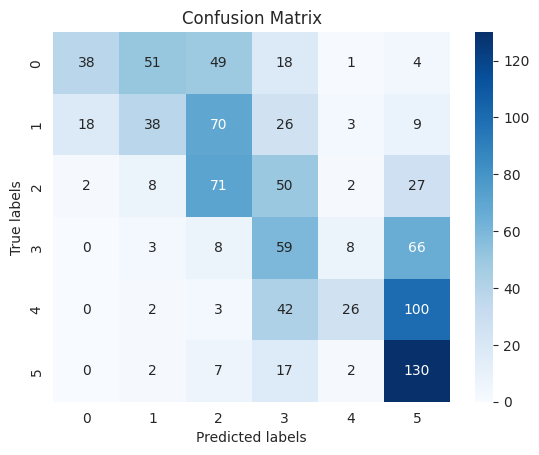

In [192]:
model.eval()
with torch.no_grad():
    test_pred_log_prob = model(test_x)  # These are log probabilities
    test_pred_prob = torch.exp(test_pred_log_prob)  # Convert to probabilities
    _, predicted_classes = torch.max(test_pred_log_prob, 1)  # Get class labels

    #Evaluating the unlabeled data, so we can upload the results obtained
    test_pred_log_prob_topredict = model(tensor_to_predict)  # These are log probabilities
    test_pred_prob_topredict = torch.exp(test_pred_log_prob_topredict)  # Convert to probabilities
    _, to_predict_labels = torch.max(test_pred_log_prob_topredict, 1)  # Get class labels



# # Make sure the model is in evaluation mode
# model.eval()

# # No gradient computation needed
# with torch.no_grad():
#     # Forward pass through the network to get the logits
#     logits = model(test_x)

#     # Convert logits to class predictions
#     y_pred = torch.argmax(logits, dim=1)

# # y_pred now contains the predicted classes for each instance in test_x
print(y_pred)
model.eval()
with torch.no_grad():
    y_pred = model(test_x)  # Get the softmax output for the test data
    _, y_pred = torch.max(y_pred, 1)  # Find the index of the max probability
print(y_pred)
precision, recall, f1, accuracy=evaluating(y_test,y_pred)

In [ ]:
to_predict_labels_list=(list(to_predict_labels.tolist()))

ids=list(range(len(to_predict_labels_list)))
# to_predict = pd.read_csv('unlabelled_test_data.csv')
# to_predict_text=to_predict['sentence']
# print(to_predict)
# to_predict['difficulty'] = list(map(lambda x: "A1", to_predict['sentence'].tolist()))
predictions = pd.DataFrame({'difficulty':to_predict_labels_list,'id':ids})
#We inversely convert the levels from strings to integers
inv_mapping = {0:'A1',1:'A2',2:'B1',3:'B2',4:'C1',5:'C2'}
predictions['difficulty'] = predictions['difficulty'].replace(inv_mapping)
predictions.set_index('id',inplace = True)
print(predictions)
predictions.to_csv('submission.csv')

# **Logistic regression**

In [ ]:
tfidf_vector = TfidfVectorizer()

In [ ]:
classifier = LogisticRegression()
pipe = Pipeline([('vectorizer', tfidf_vector),('classifier', classifier)])
pipe.fit(X_train, y_train)

# Define the hyperparameter grid
param_grid = {
    # 'vectorizer__max_df': [0.5, 0.75, 1.0],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    # 'classifier__C': [0.1, 1, 10],
    # 'classifier__penalty': ['l1', 'l2']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Optionally, evaluate on test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Best Model Test Score: {test_score}")

In [ ]:
precision, recall, f1, accuracy=evaluating(y_test,y_pred)

In [ ]:
# y_pred = pipe.predict(X_test)
# With the best model of the grid
y_pred = grid_search.predict(X_test)

In [ ]:
prediction = df_pred['sentence']
prediction_logistic_regression=pipe.predict(prediction)

submission = df_pred.copy()
submission['difficulty']=prediction_logistic_regression
submission =submission.drop('sentence',axis=1)

In [ ]:
from google.colab import files

submission.to_csv('unil_neuchatel.csv', encoding ='utf-8-sig',index=True)
# files.download('unil_neuchatel.csv')

#**kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
tfidf = TfidfVectorizer()
pipe = Pipeline([('vectorizer', tfidf),('classifier', knn)])
pipe.fit(X_train, y_train)

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
precision, recall, f1, accuracy = evaluating(y_test,y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 8))
param_grid = dict(n_neighbors=k_range)
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring = 'accuracy', return_train_score = False, verbose = 1)
pipe=Pipeline([('vectorizer', tfidf),('classifier', knn_cv)])
pipe.fit(X_train,y_train)

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
precision, recall, f1, accuracy = evaluating(y_test,y_pred)

In [ ]:
knn_cv.best_params_

In [ ]:
knn_cv.best_score_

In [ ]:
prediction_knn=pipe.predict(df_pred['sentence'])


# **Decision Tree**


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier = DecisionTreeClassifier(random_state=0)

pipe = Pipeline([('vectorizer', tfidf_vector),('classifier', classifier)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

In [ ]:
evaluating(y_test,y_pred)

# **Random Forest**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
Randfor=RandomForestClassifier()

In [ ]:
tfidf = TfidfVectorizer()

pipe = Pipeline([('vectorizer', tfidf), ('classifier', Randfor)])

pipe.fit(X_train, y_train)

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
evaluating(y_test,y_pred)

#**Random forest Regressor**

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

# Create a pipeline
tfidf = TfidfVectorizer()
Randforreg=RandomForestRegressor()
model = make_pipeline(TfidfVectorizer(), RandomForestRegressor())

# Train the model
model.fit(X_train, y_train)

# Predict and round to nearest class
predictions = model.predict(X_test)
rounded_predictions = np.rint(predictions)  # round to nearest integer



In [ ]:
from sklearn.metrics import mean_squared_error
# Evaluate the model (using regression metrics)
mse = mean_squared_error(y_test, rounded_predictions)
print(f'Mean Squared Error: {mse}')
y_pred=predictions
evaluating(y_test,y_pred)

In [ ]:
plt.plot(y_pred,'.')
print(max(y_pred))

In [ ]:
X_train[0]

# This is how to submit a pd file with predictions
### for the example we will submit a file where only A1 is given as a prediction

In [ ]:
to_predict = pd.read_csv('unlabelled_test_data.csv')
to_predict_text=to_predict['sentence']
print(to_predict)
to_predict['difficulty'] = list(map(lambda x: "A1", to_predict['sentence'].tolist()))
predictions = to_predict.drop(columns=['sentence'], inplace = False)
predictions.set_index('id',inplace = True)

predictions.to_csv('submission.csv')

In [ ]:
predictions.head(2)

In [ ]:
#! kaggle competitions submit -c detecting-french-texts-difficulty-level-2023 -f submission.csv -m "Sample submission"

In [ ]:
print(x)